# Creating a Linear Regression Model from Scratch

In this workbook, we will create a linear regression model from scratch in order to better understand the theory behind it.

In [1]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

Let's make some plot points in a numpy array for our data.

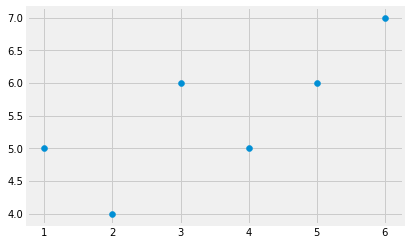

In [2]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)
plt.scatter(xs,ys)
plt.show()

We are now creating a function to create a dataset to test with for after the training is done.

hm = how much, step = how far on average, correlation is the correlation.

In [3]:
def create_dataset(hm,variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

We are now building the function that will be the core of the model. 

In [4]:
def best_fit_slope_and_intercept(xs,ys):
    m=( ( (mean(xs)*mean(ys)) - mean(xs*ys) ) /
      ( (mean(xs)**2) - (mean(xs**2)) ) )
    
    b=mean(ys)-m*mean(xs)
    
    return m, b

We now need to test to make sure everything is working usung the generated data.

In [5]:
xs, ys = create_dataset(40, 10, 2, correlation='pos')

m, b=best_fit_slope_and_intercept(xs,ys)

print(m,b)

1.9339587242026253 3.487804878048813


In [6]:
regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

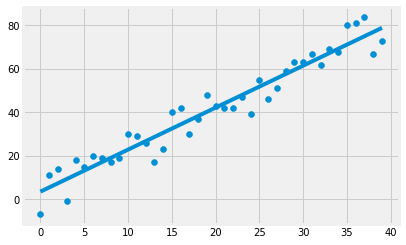

In [7]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

Now we will test for accuracy. Using r squared.

In [8]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    
    return 1 - (squared_error_regr / squared_error_y_mean)

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)
    

0.9305795115897694
